In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                             confusion_matrix, 
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Зчитуємо перший датасет:
df1 = pd.read_csv('winequality-red.csv', delimiter=';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Подивимось інформацію по колонках:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Бачимо, що колонки числові, а пропущених значень нема

In [5]:
# Зчитуємо другий датасет:
df2 = pd.read_csv('winequality-white.csv', delimiter=';')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Подивимось інформацію по колонках:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Колонки також числові, а пропущених значень нема

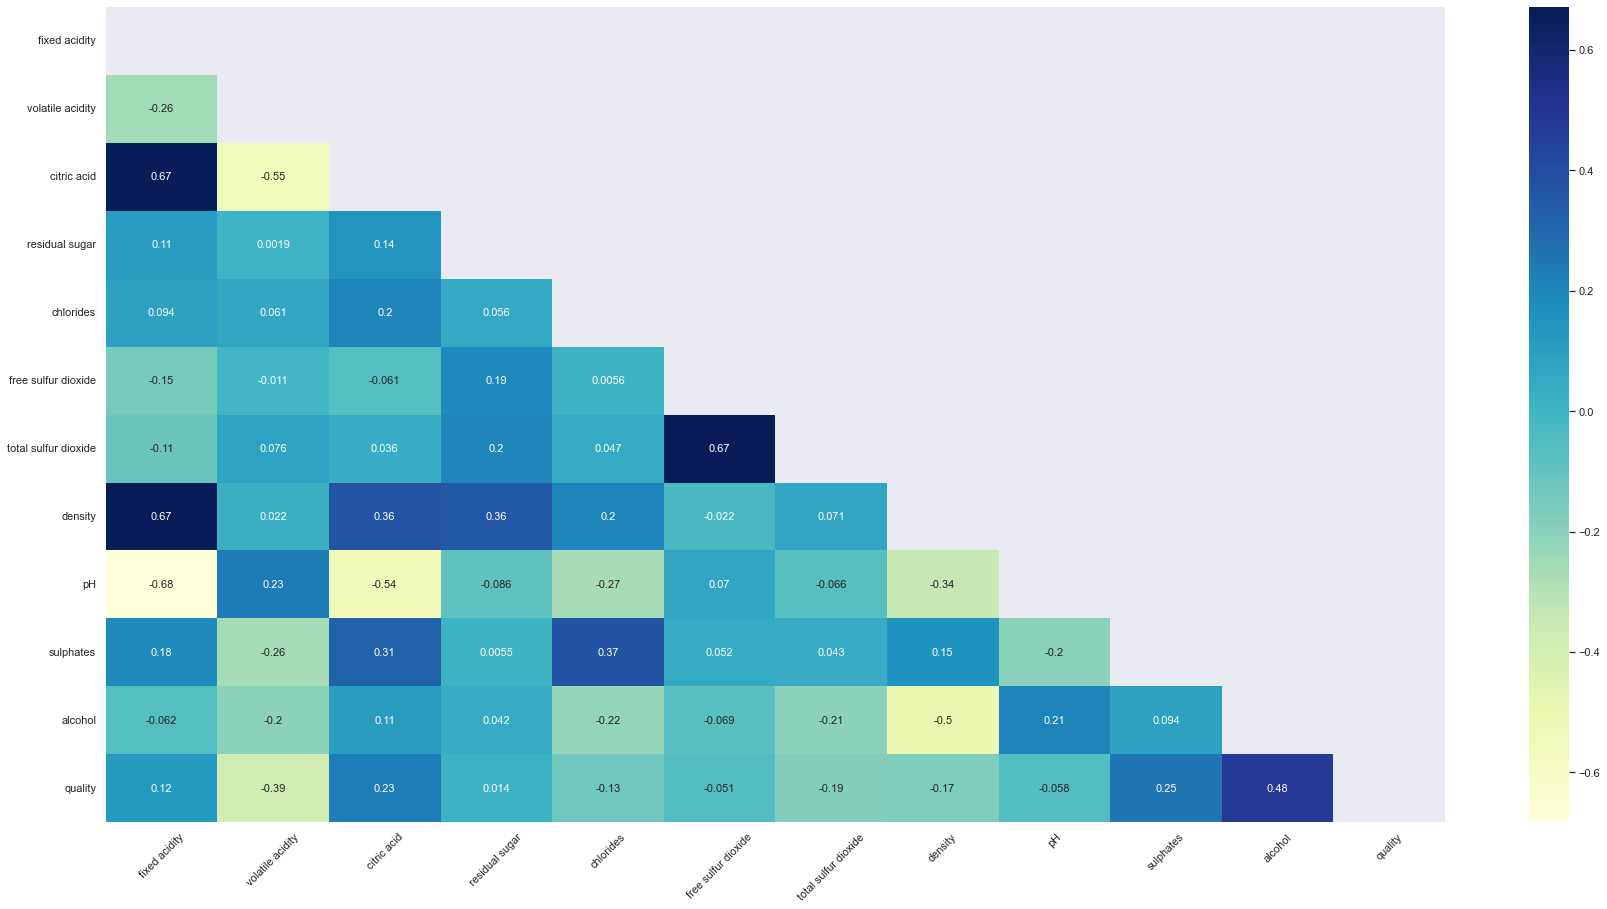

In [8]:
# Побудуємо матрицю кореляцій для першого датасету за допомогою heatmap:
corr_matrix = df1.corr()

plt.figure(figsize=(30, 15))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці:
mask = np.triu(corr_matrix)

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

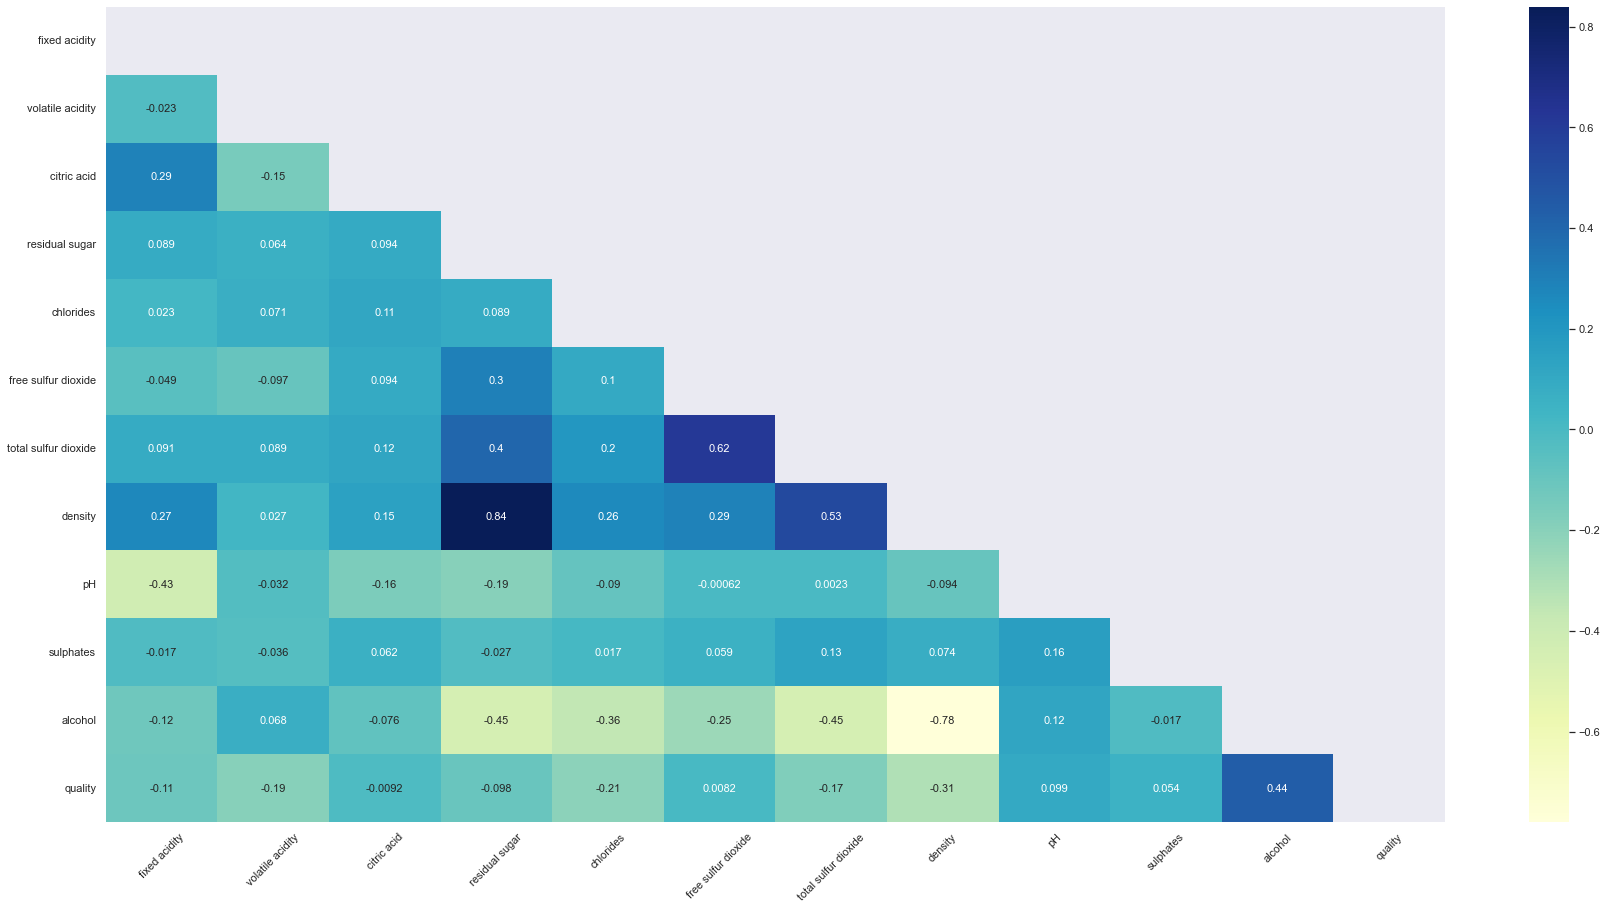

In [9]:
# Побудуємо матрицю кореляцій для другого датасету за допомогою heatmap:
corr_matrix2 = df2.corr()

plt.figure(figsize=(30, 15))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці:
mask = np.triu(corr_matrix2)

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

In [10]:
# У двох побудованих матрицях нас насамперед цікавить останній рядок - кореляція з таргетом. Ми бачимо, що для
# червоного та білого вина взаємозв'язок кінцевої якості з хімічними параметрами дещо різниться. Наприклад, кореляція
# sulphates та quality для одного датасету складає 0.25, а для іншого - 0.054. Тобто, якість двох видів вин залежить
# від різних показників, тому, на мою думку, об'єднувати датасети нема сенсу. Надалі будемо розглядати тільки якийсь один
# датасет.

In [11]:
# Давайте подивимось, які значення приймає цільова змінна в обох датасетах:
df1.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df2.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [13]:
# Бачимо, що обидва датасети несбалансовані - абсолютна більшість екземплярів мають середні значення якості, тоді як
# дуже поганих та дуже хороших вин в датасетах майже немає. Але в другому датасеті (білі вина) маємо кілька прикладів
# з оцінкою 9 та суттєво більше вин з оцінкою 8. Тому давайте зупинимось саме на цьому датасеті, як на більш цікавому 
# та складному.

In [14]:
df = df2

In [15]:
# Повертаючись до матриці кореляцій. Можемо припустити, що параметри total sulfur dioxide та free sulfur dioxide - 
# мультиколініарні. Тож давай сформуємо на їх основі нову фічу, ака буде дорівнювати їхньому середньому значенню, 
# а оригінальні фічі приберемо.

In [16]:
df['sulfur_avg'] = (df['total sulfur dioxide'] + df['free sulfur dioxide']) / 2
df = df.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,sulfur_avg
0,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6,107.5
1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6,73.0
2,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6,63.5
3,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,116.5
4,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,116.5


In [17]:
# Подивимось статистичні показники:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,sulfur_avg
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,0.994027,3.188267,0.489847,10.514267,5.877909,86.834371
std,0.843868,0.100795,0.121020,5.072058,0.021848,0.002991,0.151001,0.114126,1.230621,0.885639,27.317851
min,3.800000,0.080000,0.000000,0.600000,0.009000,0.987110,2.720000,0.220000,8.000000,3.000000,7.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,0.991723,3.090000,0.410000,9.500000,5.000000,67.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,0.993740,3.180000,0.470000,10.400000,6.000000,84.500000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,0.996100,3.280000,0.550000,11.400000,6.000000,105.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,1.038980,3.820000,1.080000,14.200000,9.000000,364.500000


<AxesSubplot:xlabel='quality', ylabel='count'>

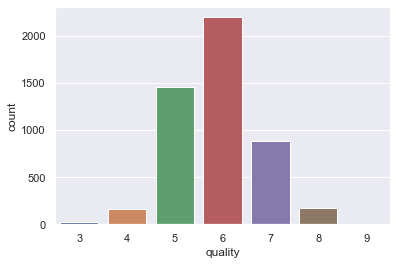

In [18]:
# Виведемо графік розподілу цільової змінної:
sns.countplot(data=df, x='quality')

In [19]:
# Ще раз переконалися, наскільки несбалансованою є цільова змінна, ймовірно, нашим моделям буде складно працювати з крайніми
# класами

In [20]:
# Для зручності відобразимо окремо відсортовану кореляцію між незалежною та залежними змінними. Сортувати будемо 
# по модулю, щоб не пропустити вагомий від'ємний зв'язок.
corr_with_quality = df.corr().quality.sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_quality.drop('quality')

,quality
alcohol,0.435575
density,-0.307123
chlorides,-0.209934
volatile acidity,-0.194723
sulfur_avg,-0.133379
fixed acidity,-0.113663
pH,0.099427
residual sugar,-0.097577
sulphates,0.053678
citric acid,-0.009209


In [21]:
# Бачимо, що великих значень зв'язку з quality немає, натомість є середні значення кореляції з alcohol, density, chlorides.

In [22]:
# Збережемо назви фіч, для яких модуль коефіцієнта кореляції > 0.05, в окремий список:
top_features = corr_with_quality[abs(corr_with_quality.quality) > 0.05].index.tolist()
top_features

['quality',
 'alcohol',
 'density',
 'chlorides',
 'volatile acidity',
 'sulfur_avg',
 'fixed acidity',
 'pH',
 'residual sugar',
 'sulphates']

In [23]:
# Побудуємо pairplot, який дасть змогу побачити взаємозв'язки між змінними а також графіки розподілу кожної з них.
# Для візуальної зручності використаємо метод sample зі значенням frac=0.2

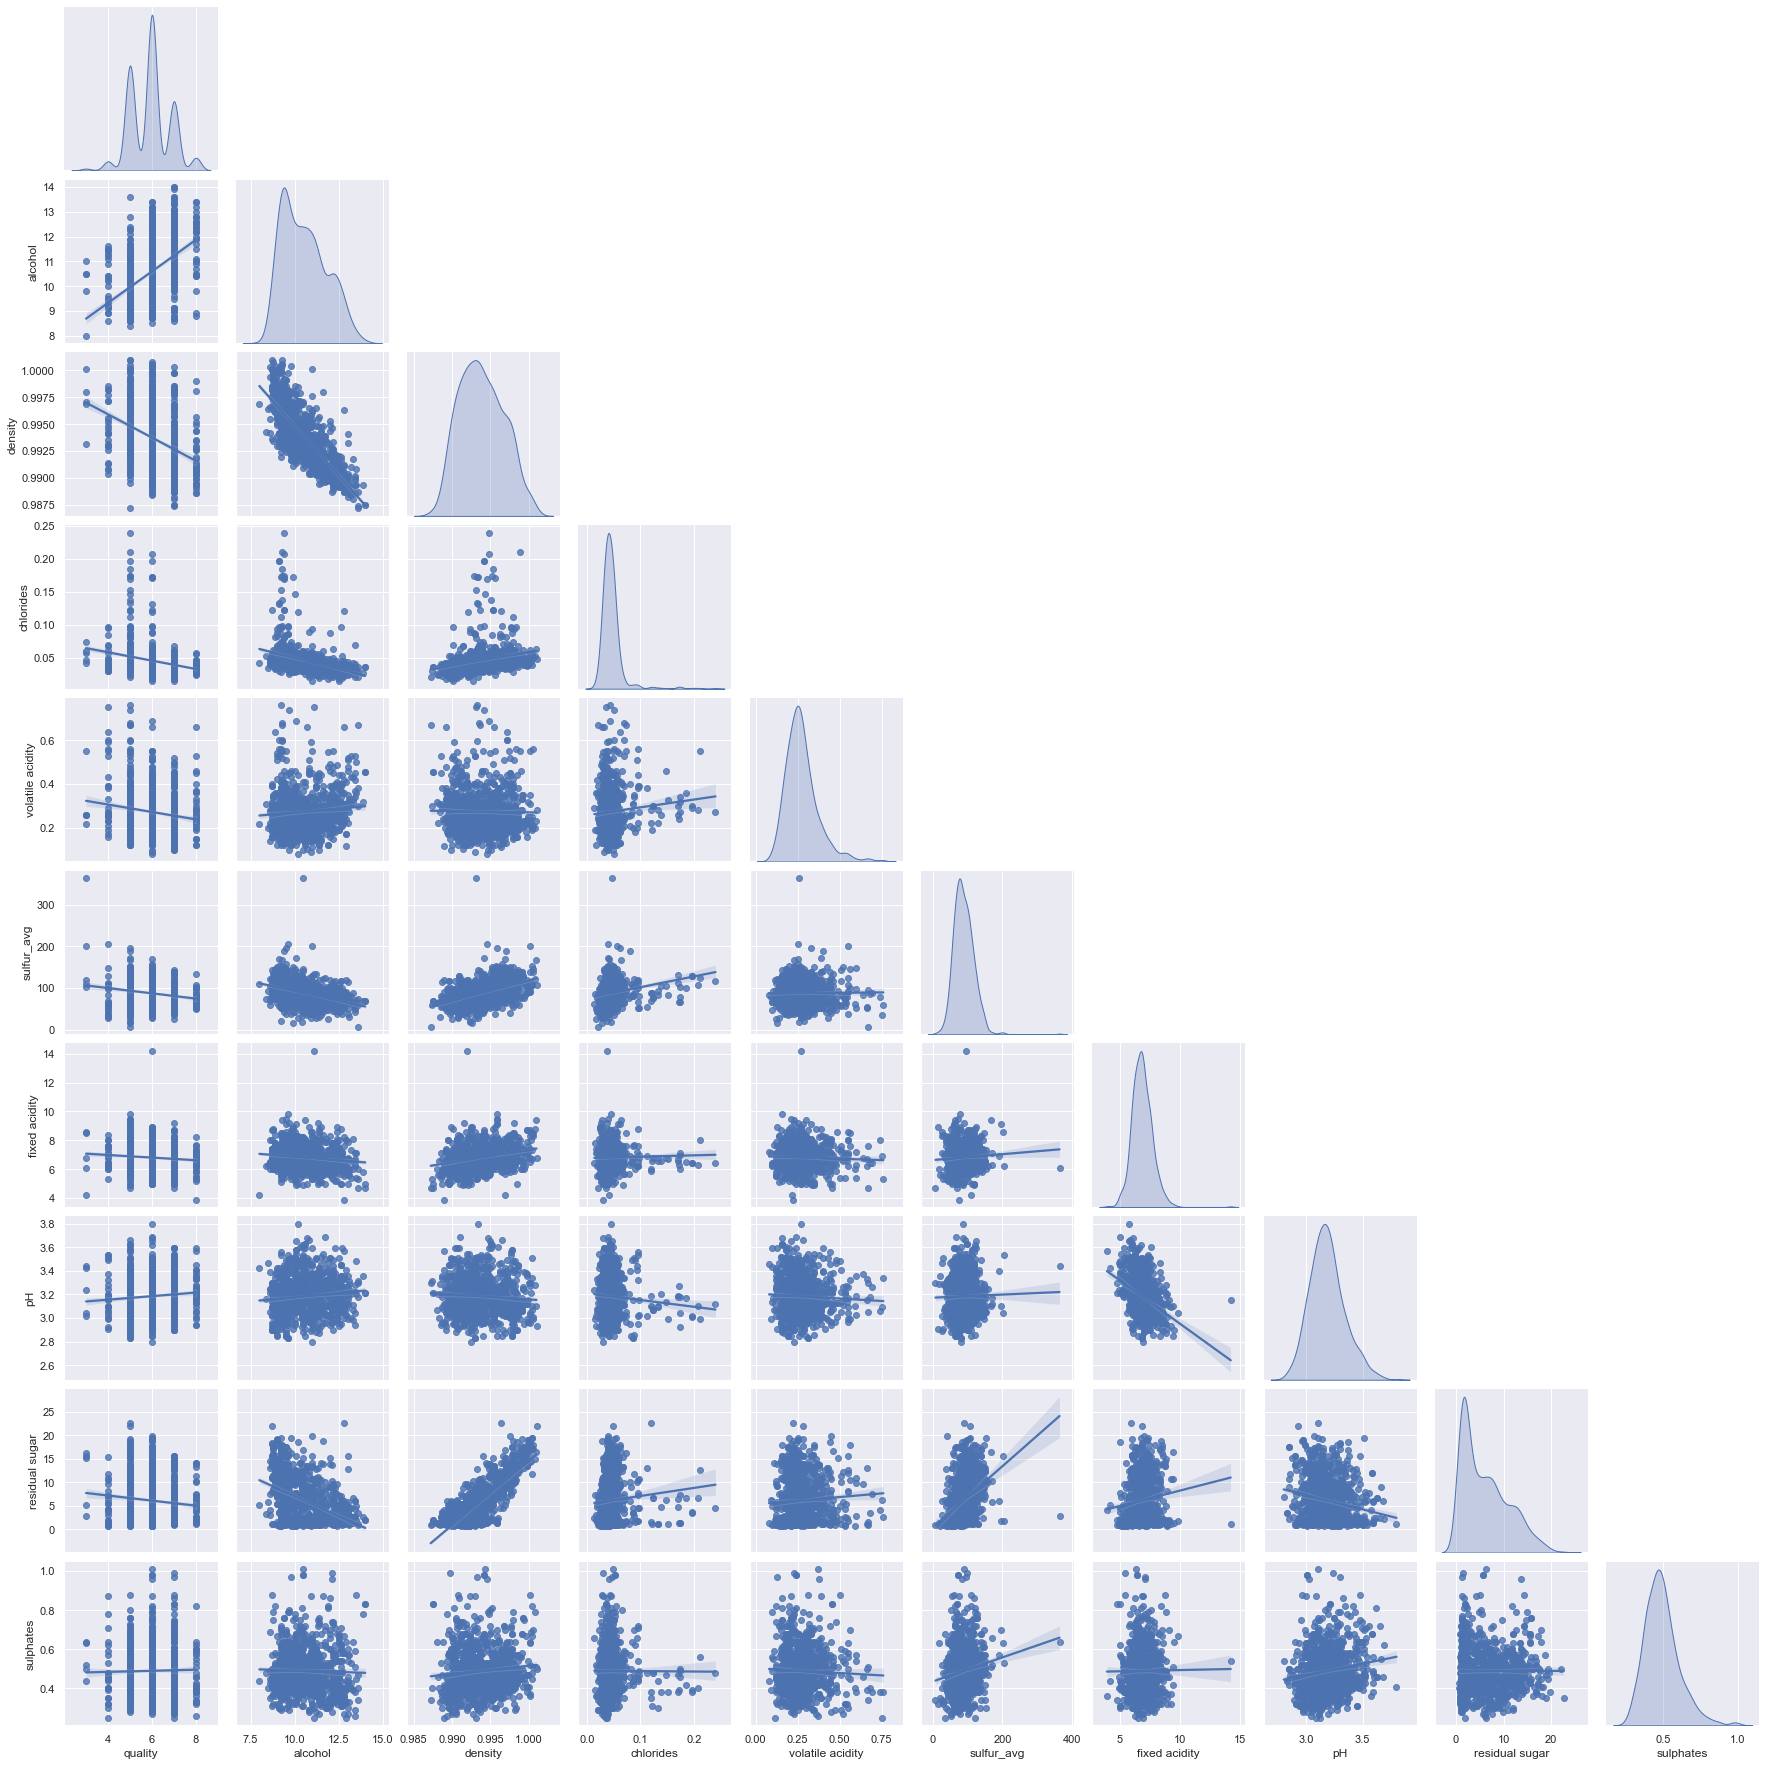

In [24]:
sns.pairplot(df[top_features].sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='kde')

In [25]:
# Оскільки цільова змінна - ординальна, дивитись на її зв'язки за допомогою регплотів не дуже зручно. Давайте додатково
# побудуємо серію боксплотів:

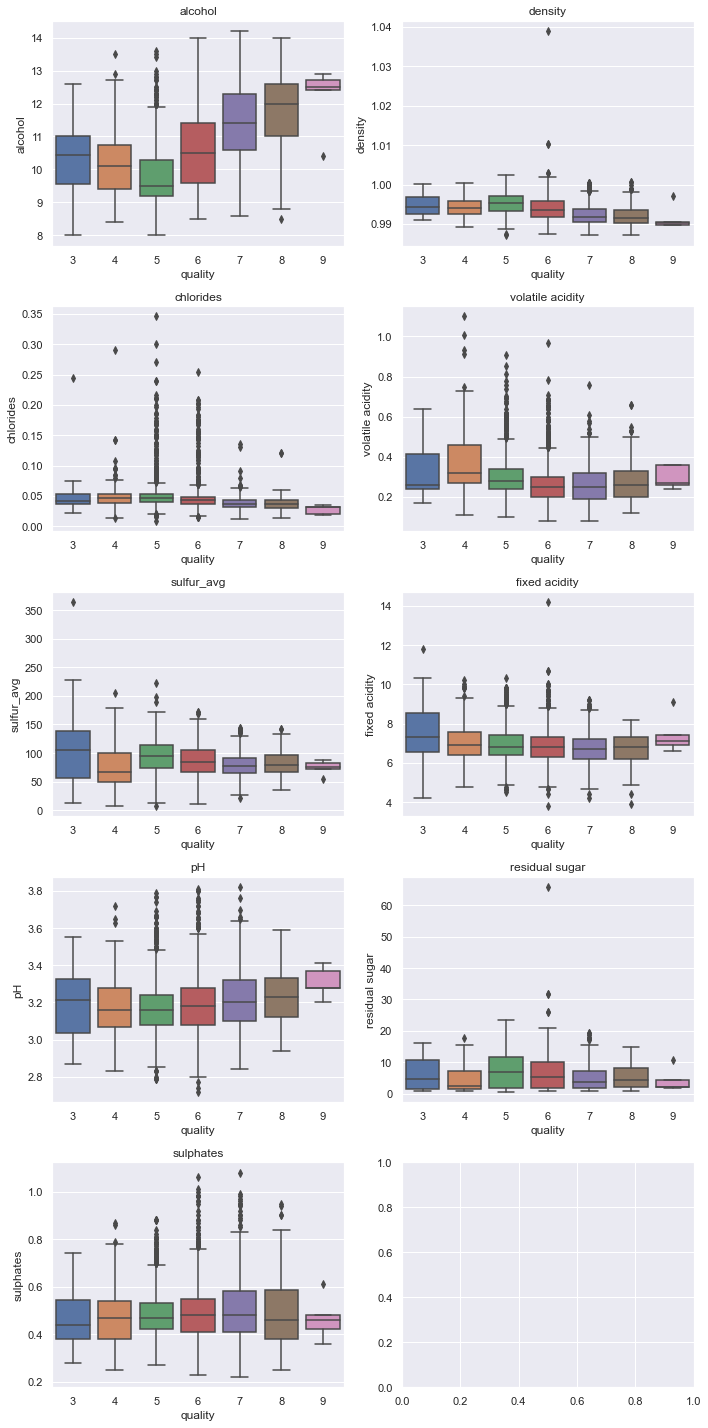

In [26]:
n_features = len(top_features)
n_rows = (n_features) // 2
n_cols = 2
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))

for i, feature in enumerate(top_features[1:]):
    row = i // 2
    col = i % 2
    sns.boxplot(x='quality', y=feature, data=df, ax=axs[row][col])
    axs[row][col].set_title(feature)
    
plt.tight_layout()

plt.show()

In [27]:
# Боксплоти дозволяють більш чітко побачити взаємозв'язок між якістю вина та незалежними фічами. Бачимо, що у багатьох
# випадках не дивлячись на невеликі значення кореляції можна спостерігати певні залежності, зокрема, квадратичні.

In [28]:
# Створимо матрицю фіч на основі top_features а також цільовий вектор y:
X = df[top_features[1:]]
y = df.quality

In [29]:
# Розіб'ємо дані на трейн і тест. Оскільки вони незбалансовані, використаємо парамер stratify=y.
# Також для зручності будемо розбивати не самі дані, а індекси. 
train_ids, test_ids = train_test_split(X.index, test_size=.3, random_state=42, stratify=y)

In [30]:
# Давайте перевіримо, чи пропорційно відносно цільової змінної розбились індекси train та test:

for dataset_ids in [train_ids, test_ids]:
    print(y[dataset_ids].value_counts(normalize=True), end='\n\n')

6    0.448658
5    0.297550
7    0.179697
8    0.035589
4    0.033256
3    0.004084
9    0.001167
Name: quality, dtype: float64

6    0.448980
5    0.297279
7    0.179592
8    0.036054
4    0.033333
3    0.004082
9    0.000680
Name: quality, dtype: float64



In [31]:
# Все ок=)

In [32]:
# Зробимо масштабування даних. Навчаємо scaler тільки на тренувальних даних, перетворюємо train і test:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X.loc[train_ids])
X_test_scaled = scaler.transform(X.loc[test_ids])

In [33]:
# Валідацію будемо робити в середині train вибірки, тому зараз не виділяємо окрему групу даних.

## Лінійна регресія 

In [34]:
# Створюємо об'єкт лінійної регресії:
reg = LinearRegression()

# Робимо крос-валідацію с кількістю фолдів = 5:
cv_scores = cross_val_score(reg, X_train_scaled, y[train_ids], cv=5)

# Тренуємо модель на тренувальних даних:
reg.fit(X_train_scaled, y[train_ids])

# Розраховуємо оцінку на треувальній та тестовій вибірці:
train_score = reg.score(X_train_scaled, y[train_ids])
test_score = reg.score(X_test_scaled, y[test_ids])

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.25720482 0.26190773 0.29556697 0.26322311 0.30643501]
Train Score: 0.28852277893840894
Test Score: 0.25877349025237417


In [35]:
# Бачимо, що оцінка по 5 фолдам у нас вийшла майже однакова, це означає, що модель стабільна.

In [36]:
# Знайдемо метрики моделі MSE та RMSE. Для цього напишемо функцію, яку зможемо застосовувати пізніше:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    
    return {
        "MSE Train": round(mse_train, 3),
        "MSE Test": round(mse_test, 3),
        "RMSE Train": round(rmse_train, 3),
        "RMSE Test": round(rmse_test, 3)
    }

In [37]:
evaluate_model(reg, X_train_scaled, X_test_scaled, y[train_ids], y[test_ids])

{'MSE Train': 0.559, 'MSE Test': 0.58, 'RMSE Train': 0.747, 'RMSE Test': 0.761}

In [38]:
# Бачимо, що метрики знаходяться на нормальному рівні. При цьому помилки на тестовій вибірці лише трішки більші за 
# відповідні помилки на тренувальній вибірці. Це добре і означає, що модель не перенавчилась. 

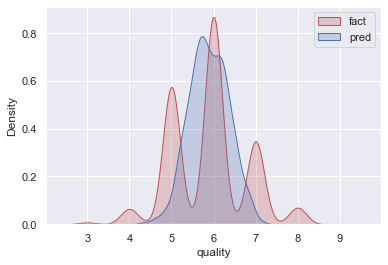

In [41]:
# Цікаво візуалізувати наші результати за допомогою графіка щільності:
sns.kdeplot(df.quality[test_ids], shade=True, color='r', label='fact')
sns.kdeplot(reg.predict(X_test_scaled), shade=True, color='b', label='pred')
plt.legend()

In [ ]:
# Бачимо, що більшість передбачених значень знаходиться в діапазоні від 5 до 7. Це означає, що модель не
# справляється з крайніми класами якості (через малу кількість прикладів).

## Лінійна регресія з регуляризацією

In [42]:
# Використаємо elastic_net регуляризацію, яка дозволяє знайти баланс між l1 та l2:
elastic_net = ElasticNet()

# Задаємо сітку гіпер-параметрів:
param_grid = {
    'alpha': np.linspace(0.001, 2, 100),
    'l1_ratio': np.linspace(0.1, 0.99, 10),
}

# Створюємо об'єкт grid_search та навчаємо його на трейн даних:
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y[train_ids])

# Отримуємо модель з найкращою комбінацією параметрів:
best_model = grid_search.best_estimator_

# Використовуємо її для передбачень по трейн та тест вибіркам:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Вивидимо найкращу модель на екран
print("Best Model:", best_model)

Best Model: ElasticNet(alpha=0.021191919191919192, l1_ratio=0.1)


In [43]:
# Виводимо метрики моделі:
evaluate_model(best_model, X_train_scaled, X_test_scaled, y[train_ids], y[test_ids])

{'MSE Train': 0.561,
 'MSE Test': 0.581,
 'RMSE Train': 0.749,
 'RMSE Test': 0.763}

In [ ]:
# Метрики залишились приблизно на тому ж рівні. Можна зробити висновок, що регуляризація не допомогла, оскільки
# модель і без неї не була схильна до перенавчання

## Поліноміальна регресія

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

# Навчаємо поліноміальну регресію на отриманому на попередньому кроці масиві X_poly_train
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y.loc[train_ids])

evaluate_model(lr_poly, X_poly_train, X_poly_test, y[train_ids], y[test_ids])

{'MSE Train': 0.496,
 'MSE Test': 0.545,
 'RMSE Train': 0.704,
 'RMSE Test': 0.738}

In [ ]:
# Тут бачимо, що метрики стали трішки кращими, але разом з тим зросла різниця між train та test, одже модель почала
# трохи перенавчатись, що є властивим для ступеневої регресії.

## Логістична регресія

In [45]:
# Оскільки наша цільова змінна є дискретною та ординальною, цілком доречно розглядати побудову моделі як проблему
# класифікації. Тож давайте спробуємо застосувати логістичну регресію і подивимось, що вийде.

In [46]:
# Створимо функцію, яка буде виводити репорти:
def get_report(model, X, y_true):
    y_pred = model.predict(X)
    print(classification_report(y_true, y_pred, digits=3))

In [48]:
# Навчимо та застосуємо логістичну регресію а також виведемо репорт:

LogReg = LogisticRegression(random_state=42)
LogReg.fit(X_train_scaled, y[train_ids])

print('Logistic regression, train data:')
get_report(LogReg, X_train_scaled, y.loc[train_ids])

print('Logistic regression, train data:')
get_report(LogReg, X_test_scaled, y.loc[test_ids])

Logistic regression, train data:
              precision    recall  f1-score   support

           3      1.000     0.143     0.250        14
           4      0.727     0.070     0.128       114
           5      0.588     0.520     0.552      1020
           6      0.514     0.742     0.608      1538
           7      0.475     0.227     0.307       616
           8      0.000     0.000     0.000       122
           9      0.000     0.000     0.000         4

    accuracy                          0.531      3428
   macro avg      0.472     0.243     0.264      3428
weighted avg      0.519     0.531     0.497      3428

Logistic regression, train data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.500     0.061     0.109        49
           5      0.583     0.513     0.546       437
           6      0.526     0.758     0.621       660
           7      0.535     0.261     0.351       264
           8

In [49]:
# Аналізуючи отримані метрики, можна прийти до висновку, що модель досягла дуже посередніх результатів. Accuracy нашої
# моделі склала 0.541, але класи є сильно несбалансованими, отже використовувати цю метрику недоцільно. Оскільки маємо
# мультикласову класифікацію, при якій всі класи однаково важливі, то метрики precision та recall мають однакове
# значення. А отже можемо орієнтуватися на f1-score, який є середнім гармонійним між ними. 

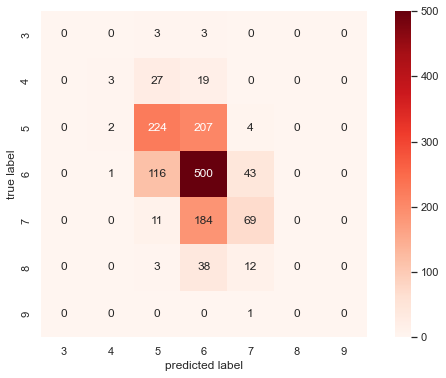

In [50]:
# Давайте для наглядності побудуємо confusion matrix:

labels = LogReg.classes_
y_pred = LogReg.predict(X_test_scaled)
cm = confusion_matrix(y.loc[test_ids], y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label');

In [51]:
# Як бачимо, вірно угадані значення знаходяться на діагоналі матриці. Наша модель відносно непогано справилась лише 
# з класом 6, у всіх інших були великі проблеми. У класах 3, 8, 9 немає жодного вгаданого значення. Причина такої
# невдачі - мала кількість прикладів з цими класами.

In [52]:
# Наприкінці побудуємо логістичну регресію з підбором гіперпараметрів:

LogReg = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(estimator=LogReg, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y[train_ids])
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

print("Logistic Regression (Best Model) - Train Data")
get_report(best_model, X_train_scaled, y.loc[train_ids])

print("Logistic Regression (Best Model) - Test Data")
get_report(best_model, X_test_scaled, y.loc[test_ids])

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression (Best Model) - Train Data
              precision    recall  f1-score   support

           3      1.000     0.143     0.250        14
           4      0.667     0.070     0.127       114
           5      0.589     0.520     0.552      1020
           6      0.515     0.742     0.608      1538
           7      0.478     0.231     0.311       616
           8      0.000     0.000     0.000       122
           9      0.000     0.000     0.000         4

    accuracy                          0.532      3428
   macro avg      0.464     0.244     0.264      3428
weighted avg      0.518     0.532     0.498      3428

Logistic Regression (Best Model) - Test Data
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         6
           4      0.600     0.061     0.111        49
           5      0.584     0.515     0.547       437
           6      0.526     

In [ ]:
# Як і очікувалось, суттєвого покращення метрик не відбулось, адже вибрані гіпер-параметри спрямовані здебільшого на 
# роботу з регуляризацією, а наша модель і так не перенавчається.

In [53]:
# Висновок: усім нашим моделям не вистачає даних, особливо в крайніх класах, тому вони демонструють слабкі результати.
# Ситуацію можна було б покращити, застосувавши синтез даних, але не хочеться сильно розтягувати цю домашку і
# витрачати час викладача, і так багатенько вийшло =)